## Job Dataset

Dataset is obtained from:

https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = 'C:/DATASET/'

In [3]:
import os
import zipfile
if not os.path.isdir(filePath+"job_descriptions"):
    with zipfile.ZipFile(filePath+'job_dataset_kaggle.zip', 'r') as zip_ref:
        zip_ref.extractall(filePath+'job_descriptions')

In [4]:
import pandas as pd

df = pd.read_csv(filePath+'job_descriptions/job_descriptions.csv')

In [5]:
len(df)

1615940

### Examine the dataset

In [6]:
df.dtypes

Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

In [7]:
df.Experience.value_counts().tail(5)

2 to 15 Years    33390
4 to 9 Years     33384
3 to 10 Years    33378
4 to 13 Years    33374
0 to 10 Years    33341
Name: Experience, dtype: int64

In [8]:
df.Qualifications.value_counts()

BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: Qualifications, dtype: int64

In [9]:
df['Salary Range'].value_counts()

$59K-$88K     3043
$58K-$101K    3038
$62K-$82K     3033
$61K-$106K    3025
$61K-$112K    3015
              ... 
$55K-$110K    2731
$63K-$117K    2727
$58K-$129K    2724
$63K-$102K    2722
$62K-$121K    2717
Name: Salary Range, Length: 561, dtype: int64

In [10]:
df['Company Size'].value_counts()

83541     31
58998     30
15838     30
100013    30
96377     29
          ..
82130      2
99576      2
55188      2
101119     1
101368     1
Name: Company Size, Length: 122188, dtype: int64

In [11]:
df['Job Posting Date'].value_counts()

2021-11-14    2378
2022-03-08    2339
2023-05-24    2332
2023-08-20    2327
2023-05-28    2327
              ... 
2022-11-29    2100
2021-11-16    2096
2022-02-13    2088
2022-08-19    2072
2022-05-28    2071
Name: Job Posting Date, Length: 731, dtype: int64

In [12]:
df['Work Type'].value_counts()

Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: Work Type, dtype: int64

In [13]:
df['Role'].value_counts()

Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: Role, Length: 376, dtype: int64

In [14]:
df['Country'].value_counts()

Malta            7723
Venezuela, RB    7694
Somalia          7689
Sierra Leone     7656
Vietnam          7649
                 ... 
Ghana            7312
Ukraine          7307
Iceland          7292
Uganda           7290
Lithuania        7273
Name: Country, Length: 216, dtype: int64

In [15]:
df['Company'].value_counts()

DTE Energy                            1957
Berry Global Group                    1941
Marsh & McLennan                      1941
Vistra                                1938
International Flavors & Fragrances    1928
                                      ... 
Textron                               1714
Marriott International                1712
Wayfair                               1702
Lumen Technologies                    1699
Siemens AG                            1678
Name: Company, Length: 888, dtype: int64

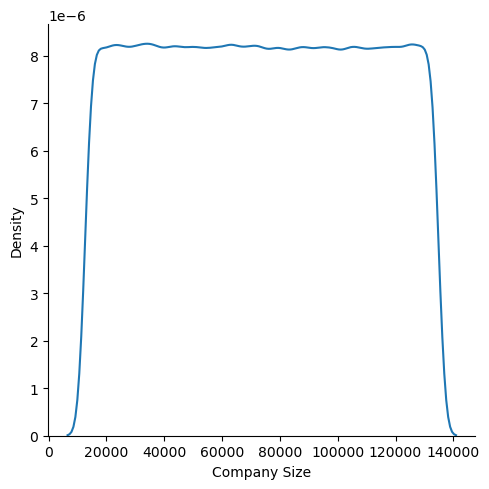

In [16]:
# Company Size
sns.displot(data = df, x='Company Size', kind="kde")
plt.show()

In [18]:
## Examine and extract Company Profile column

### Extract necessary columns

In [17]:
df2  = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
          'Role', 'Company']]

df2.head(5)

,Experience,Qualifications,Salary Range,Country,latitude,longitude,Work Type,Company Size,Role,Company
0,5 to 15 Years,M.Tech,$59K-$99K,Isle of Man,54.2361,-4.5481,Intern,26801,Social Media Manager,Icahn Enterprises
1,2 to 12 Years,BCA,$56K-$116K,Turkmenistan,38.9697,59.5563,Intern,100340,Frontend Web Developer,PNC Financial Services Group
2,0 to 12 Years,PhD,$61K-$104K,"Macao SAR, China",22.1987,113.5439,Temporary,84525,Quality Control Manager,United Services Automobile Assn.
3,4 to 11 Years,PhD,$65K-$91K,Benin,9.3077,2.3158,Full-Time,129896,Wireless Network Engineer,Hess
4,1 to 12 Years,MBA,$64K-$87K,Chile,-35.6751,-71.5429,Intern,53944,Conference Manager,Cairn Energy


In [18]:
# Check for NAs
row_has_NaN = df2.isnull().any(axis=1)
rows_with_NaN = df2[row_has_NaN]
#rows_without_NaN = df2[-row_has_NaN]
len(rows_with_NaN)

0

### sub-sample the dataset for training

In [19]:
num_sample_per_value = 50
subset_ind = np.array([])
category_cols = ['Qualifications', 'Country', 'Work Type', 'Role', 'Company']
for i in range(len(category_cols)):
    subset_ind = np.append(subset_ind, 
                           np.array(df2.groupby(category_cols[i]).sample(n=num_sample_per_value).index.values))
print(len(subset_ind))
# remove duplicates
subset_ind = np.unique(subset_ind)
print(len(subset_ind))

74750
73753


In [20]:
# Extract the necessary rows
df2 = df2.iloc[subset_ind,:]
print(len(df2))
print(len(df2.columns))

73753
10


In [21]:
df2['Role'].value_counts()

Interaction Designer              778
Network Administrator             653
Social Media Manager              562
User Experience Designer          540
User Interface Designer           513
                                 ... 
Brand Manager                     146
Logistics Analyst                 146
Sales Trainer                     145
Strategic Partnerships Manager    141
Structural Engineer               140
Name: Role, Length: 376, dtype: int64

In [24]:
# Extract information from range data

# method 1
#df2['ind1'] = df2['Experience'].str.find(' to ')
#df2['ind2'] = df2['Experience'].str.find(' Years')
#df2.test = df2.apply(lambda x: x['Experience'][0:x['ind1']], axis=1)
#print(df2.test)

# method 2
#ind1 = df2['Experience'].str.find(' to ')
#ind2 = df2['Experience'].str.find(' Years')
#test = [data[0:x] for data,x in zip(df2.Experience[0:100],ind1)]
#print(test)

# method 3: str.split
#temp = df2.Experience.str.split('to|Years', expand=True)
#print(temp)

### Extract info from range values

In [22]:
# experience
exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
exp_df = exp_df.astype(int)
#exp_df.loc[:,'EXP LB'] = exp_df.iloc[:,0]
#exp_df.loc[:,'EXP UB'] = exp_df.iloc[:,1]
print(exp_df)

         EXP LB  EXP UB
3             4      11
62            0      11
85            5      13
117           3      13
124           4      14
...         ...     ...
1615785       5      15
1615857       1       9
1615858       4      14
1615924       3      11
1615938       5      15

[73753 rows x 2 columns]


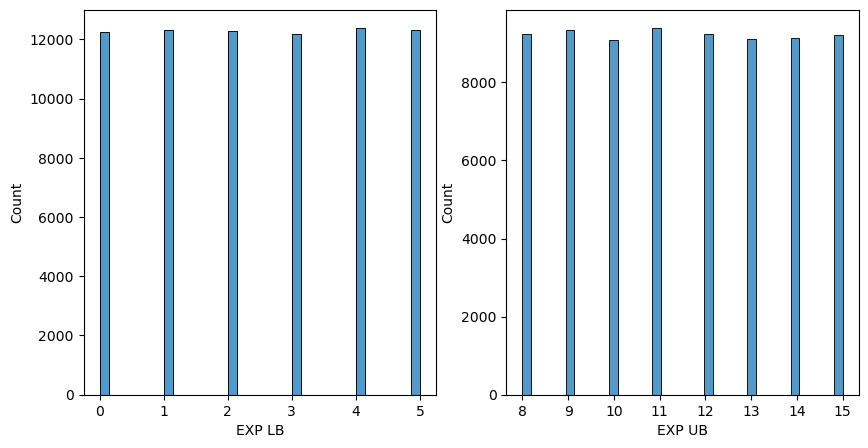

In [23]:
# Plot the experience LB and UB
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=exp_df, x='EXP LB', ax=ax[0])
sns.histplot(data=exp_df, x='EXP UB', ax=ax[1])
plt.show()

In [24]:
# salary
salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000
#mid_salary = mid_salary.to_frame(name='Mid Salary')
print(salary_df)

        0    1 2  3     4 5   Mid Salary
3           65         91        78000.0
62          56         94        75000.0
85          59        113        86000.0
117         65        113        89000.0
124         60        107        83500.0
...     ..  .. .. ..  ... ..         ...
1615785     63         86        74500.0
1615857     62        124        93000.0
1615858     62        106        84000.0
1615924     57         91        74000.0
1615938     65        103        84000.0

[73753 rows x 7 columns]


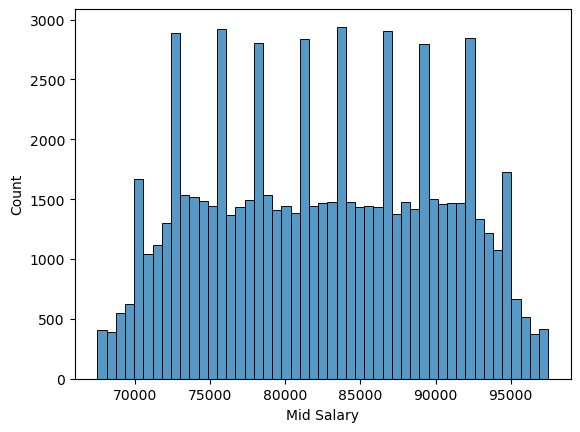

In [25]:
# Plot the mid salary
sns.histplot(salary_df['Mid Salary'])
plt.show()

In [26]:
df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                exp_df[['EXP LB', 'EXP UB']],
                salary_df['Mid Salary']], 
                axis=1)
display(df3.head(5))

,Qualifications,Country,latitude,longitude,Work Type,Company Size,Role,Company,EXP LB,EXP UB,Mid Salary
3,PhD,Benin,9.3077,2.3158,Full-Time,129896,Wireless Network Engineer,Hess,4,11,78000.0
62,M.Tech,Somalia,5.1521,46.1996,Contract,121311,Mobile App Developer,Starbucks,0,11,75000.0
85,BBA,Sri Lanka,7.8731,80.7718,Temporary,36167,Electronics Hardware Engineer,Unilever,5,13,86000.0
117,BCA,Gambia,13.4432,-15.3101,Part-Time,56816,Strategic Partnerships Manager,Tenet Healthcare,3,13,89000.0
124,B.Com,Cabo Verde,16.5388,-23.0418,Intern,88454,Wedding Designer,Consolidated Edison,4,14,83500.0


In [27]:
df3.dtypes

Qualifications     object
Country            object
latitude          float64
longitude         float64
Work Type          object
Company Size        int64
Role               object
Company            object
EXP LB              int32
EXP UB              int32
Mid Salary        float64
dtype: object

### one-hot encode categorical data

In [28]:
# One-hot encode the "color" column
one_hot = pd.get_dummies(df3.select_dtypes(include='object')).astype('category')

In [29]:
print(len(one_hot))
print(len(one_hot.columns))

73753
1495


In [30]:
# number of numerical columns
print('Number of numerical columns: {}'.format(
    len(df3.select_dtypes(include='number').columns)
))

Number of numerical columns: 6


In [31]:
# Merge the categorical (one-hot) data to the numerical data

df4 = pd.concat([df3.select_dtypes(include='number'),
                 one_hot], axis=1)
print(len(df4.columns))

1501


In [32]:
# train test split
from sklearn.model_selection import train_test_split

X = df4.drop(['Mid Salary'], axis=1)
y = df4.loc[:,'Mid Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)

In [33]:
#X_train.reset_index().select_dtypes(include='object')
print( len(X_train.select_dtypes(include='number').columns) )

5


In [34]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='category')

scaler = StandardScaler().fit(X_train_numerical)

In [35]:
# Scaling X_train
X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                     X_train_categorical.astype('bool')], axis=1, ignore_index=False)

In [36]:
X_train_scaled.dtypes

latitude                                 float64
longitude                                float64
Company Size                             float64
EXP LB                                   float64
EXP UB                                   float64
                                          ...   
Company_Xiaomi Corporation                  bool
Company_Yum China Holdings                  bool
Company_ZTE Corporation                     bool
Company_Zee Entertainment Enterprises       bool
Company_Zoetis                              bool
Length: 1500, dtype: object

In [37]:
display(X_train_scaled.head(5))

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,1.798181,-0.331316,1.475352,1.462684,-1.086583,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.986133,0.127171,-1.589236,-1.464053,1.095519,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.575948,2.286458,-0.197030,1.462684,-1.523004,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.173840,0.042508,-1.531431,0.877337,-0.650163,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.513216,0.104465,1.486244,-1.464053,-0.213743,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Scaling X_test
X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='category')
X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                     X_test_categorical.astype('bool')], axis=1, ignore_index=False)

In [39]:
display(X_test_scaled.tail(5))

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
14746,-0.506637,1.671098,0.391687,0.877337,0.659098,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14747,0.609785,0.274019,0.911112,0.291989,-0.650163,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14748,-1.428515,-0.968343,-0.221168,-0.293358,-1.523004,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14749,0.826586,0.609334,-0.686248,1.462684,-1.086583,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14750,-1.711195,2.110310,-0.366362,-0.293358,-0.650163,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
y_train_resetIndex = y_train.reset_index(drop=True)
y_test_resetIndex = y_test.reset_index(drop=True)

In [42]:
# XGBOOST Regressor

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import time

#xgb_model = xgb.XGBRegressor(objective="reg:squarederror",  #enable_categorical=True,
#                             random_state=1234,
#                            n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

dtrain = xgb.DMatrix(X_train_scaled, label=y_train_resetIndex)
watchlist = [(dtrain, 'train')]
params = {"booster":"gblinear",
    "objective":"reg:squarederror", 'max_depth': 6, 'learning_rate': 0.1}

start_time = time.time()

#xgb_model.fit(X_train_scaled, 
#             y_train_resetIndex)

xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)

print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[13:17:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	train-rmse:44272.41634
[1]	train-rmse:24268.54098
[2]	train-rmse:14379.86882
[3]	train-rmse:9992.98017
[4]	train-rmse:8355.73745
[5]	train-rmse:7819.38130
[6]	train-rmse:7644.44897
[7]	train-rmse:7578.24820
[8]	train-rmse:7545.12327
[9]	train-rmse:7523.66051
time taken : 0.02 min


In [43]:
# model evaluation with test set
dtest = xgb.DMatrix(X_test_scaled, label=y_test_resetIndex)
y_pred = xg_reg.predict(dtest)
mse=mean_squared_error(y_test_resetIndex, y_pred)
print(np.sqrt(mse))

7642.41884336761


“The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction

In [44]:
#xg_reg.get_score(importance_type='gain')

xg_reg.get_score(importance_type='weight')
# ‘weight’: the number of times a feature is used to split the data across all trees.
# the number of occurrences of the feature in splits: integers greater than 0 (features not participating in splits are omitted)

{'latitude': 20.7387752532959,
 'longitude': -82.2197494506836,
 'Company Size': 18.752986907958984,
 'EXP LB': -10.092344284057617,
 'EXP UB': 24.176965713500977,
 'Qualifications_B.Com': 15022.744140625,
 'Qualifications_B.Tech': 14999.5732421875,
 'Qualifications_BA': 14950.0869140625,
 'Qualifications_BBA': 14785.3154296875,
 'Qualifications_BCA': 14543.697265625,
 'Qualifications_M.Com': 14508.2529296875,
 'Qualifications_M.Tech': 14321.2021484375,
 'Qualifications_MBA': 14333.4287109375,
 'Qualifications_MCA': 14220.2607421875,
 'Qualifications_PhD': 14160.9853515625,
 'Country_Afghanistan': 11833.0361328125,
 'Country_Albania': 11848.1396484375,
 'Country_Algeria': 11864.5654296875,
 'Country_American Samoa': 12236.2958984375,
 'Country_Andorra': 12241.2431640625,
 'Country_Angola': 12407.0419921875,
 'Country_Antigua and Barbuda': 12100.9296875,
 'Country_Argentina': 12380.0859375,
 'Country_Armenia': 12200.1982421875,
 'Country_Aruba': 12088.01171875,
 'Country_Australia': 121

In [45]:
# ranking the values and pick the top features
feature_weights = xg_reg.get_score(importance_type='weight')
#print(type(feature_weights))
#print(feature_weights['Role_Frontend Developer'])
#sorted(feature_weights, key=feature_weights.get, reverse=True)

feature_weights = pd.DataFrame.from_dict(feature_weights, 
                                         orient='index', 
                                         columns=['Weight']).reset_index(names=['Feature Name'])

# sort the weight in descending order and extract the top 100
top_cols = feature_weights.sort_values(['Weight'], ascending=False).iloc[:100,0]
#print(type(top_cols))

In [46]:
# xgb_model.feature_importances_

In [73]:
# Run the model again but with top_cols features plus the original numerical columns
feature_cols = np.concatenate([X_train_scaled.select_dtypes(include='number').columns.values,
                      top_cols.values])


dtrain = xgb.DMatrix(X_train_scaled.loc[:,feature_cols], label=y_train_resetIndex)
watchlist = [(dtrain, 'train')]
params = {"booster":"gblinear",
    "objective":"reg:squarederror", 
    'max_depth': 6, 
    'learning_rate': 1}

start_time = time.time()

#xgb_model.fit(X_train_scaled, 
#             y_train_resetIndex)

xg_reg2 = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)

print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[15:07:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	train-rmse:7529.09106
[1]	train-rmse:7528.99172
[2]	train-rmse:7528.98471
[3]	train-rmse:7528.98454
[4]	train-rmse:7528.98453
[5]	train-rmse:7528.98458
[6]	train-rmse:7528.98456
[7]	train-rmse:7528.98458
[8]	train-rmse:7528.98457
[9]	train-rmse:7528.98456
time taken : 0.00 min


In [74]:
# Evaluate with Testing dataset
dtest = xgb.DMatrix(X_test_scaled.loc[:,feature_cols], label=y_test_resetIndex)
y_pred = xg_reg2.predict(dtest)
rmse_score = mean_squared_error(y_test_resetIndex, y_pred, squared=False)
print("Train dataset rmse: {}", rmse_score)

Train dataset rmse: {} 7527.325707382503


In [75]:
# Grid Search
param_grid = {
    "objective":["reg:squarederror"],
    #"booster":["gblinear"],
    # Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features
    #'colsample_bytree': [1],
    'gamma': [0.01, 0.1, 1],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    "max_depth": [6],
    "n_estimators": [100, 150, 200],
    #"subsample": [1] # range 0 to 1
}

start_time = time.time()
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1234))
grid_search.fit(X_train_scaled, y_train_resetIndex)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 68.68 min


In [194]:
# # Randomized Search
# from scipy.stats import uniform, randint

# xgb_model2 = xgb.XGBRegressor()

# params = {
#     #"booster":"gblinear",
#     #"objective":"reg:squarederror",
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(100, 150), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# start_time = time.time()
# search = RandomizedSearchCV(xgb_model2, param_distributions=params, random_state=1234, n_iter=10, cv=3, verbose=1, n_jobs=1, return_train_score=True)
# search.fit(X_train_scaled, y_train_resetIndex)
# print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
time taken : 9.10 min


In [76]:
# Looking at the parameters from Grid search
grid_search.best_params_

{'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'objective': 'reg:squarederror'}

In [80]:
# With the best set of parameters...
# witht the best parameters...
xg_reg3 = xgb.XGBRegressor(#booster = "gblinear",
                           objective = "reg:squarederror",
                           #colsample_bytree = 1,
                           learning_rate = grid_search.best_params_['learning_rate'],
                           max_depth = grid_search.best_params_['max_depth'],
                           n_estimators = grid_search.best_params_['n_estimators'],
                           random_state = 1234)
    


start_time = time.time()
#xg_reg3 = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
xg_reg3.fit(X_train_scaled,y_train_resetIndex)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.34 min


In [81]:
# Evaluate with Train dataset
y_pred = xg_reg3.predict(X_train_scaled)
rmse_score = mean_squared_error(y_train_resetIndex, y_pred, squared=False)
print(rmse_score)

7399.643048468413


In [82]:
# Evaluate with Test dataset
y_pred = xg_reg3.predict(X_test_scaled)
rmse_score = mean_squared_error(y_test_resetIndex, y_pred, squared=False)
print(rmse_score)

7525.702369910666


### Evaluate with the remaining dataset

In [83]:
# Extract the necessary rows
def Preprocess_df(df, subset_ind, scaler):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[~df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.select_dtypes(include='object')).astype('bool')

    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4.drop(['Mid Salary'], axis=1)
    y = df4.loc[:,'Mid Salary']

    X_numerical = X.reset_index(drop=True).select_dtypes(include='number')
    X_bool = X.reset_index(drop=True).select_dtypes(include='bool')

    # Scaling X_train
    X_scaled = pd.concat([pd.DataFrame(scaler.transform(X_numerical), columns=X_numerical.columns),
                         X_bool], axis=1, ignore_index=False)
    
    return(X_scaled,y.reset_index(drop=True))

In [84]:
(X_remain,y_remain) = Preprocess_df(df, subset_ind, scaler)
display(X_remain)

,latitude,longitude,Company Size,EXP LB,EXP UB,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,Qualifications_BCA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,1.473657,-0.297866,-1.332941,1.462684,1.531939,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.826586,0.609334,0.752899,-0.293358,0.222678,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.115741,1.373362,0.304327,-1.464053,0.222678,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-2.337261,-1.245970,-0.563064,-0.878706,0.222678,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.315467,-0.170244,-1.435192,0.877337,0.222678,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542182,0.047712,0.883974,1.406740,0.291989,0.659098,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1542183,-0.755189,-0.088191,-1.574600,-1.464053,0.222678,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1542184,1.375463,0.037438,-0.288588,-0.293358,1.095519,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1542185,0.826586,0.609334,1.148488,0.877337,1.531939,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# Evaluate with the remaining dataset
#y_pred = xg_reg3.predict(X_remain)
#rmse_score = mean_squared_error(y_remain, y_pred, squared=False)
#print(rmse_score)

In [85]:
# model evaluation with 100,000 of the remaining dataset
sample_size = 100000
subset_ind2 = np.array(X_remain.sample(n=sample_size).index.values)
y_pred = xg_reg3.predict(X_remain[X_remain.index.isin(subset_ind2)])
rmse_score = mean_squared_error(y_remain[y_remain.index.isin(subset_ind2)], y_pred, squared=False)
print(rmse_score)

7532.236333986854


## Classification

use the dataset to predict the 'Work Type'

In [86]:
from sklearn.model_selection import train_test_split

def Preprocess_df_class(df, subset_ind):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.drop(['Role'], axis=1).select_dtypes(include='object')).astype('bool')
    
    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4
    y = df3['Work Type']
    
    output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    y = y.map(output_dict)
    #print(output_dict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)
    #print( list(X_train.columns.values) == list(X_test.columns.values) )
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
    X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='bool')

    scaler = StandardScaler().fit(X_train_numerical)

    # Scaling X_train
    X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                         X_train_categorical], axis=1, ignore_index=False)
    
    # Scaling X_test
    X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
    X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='bool')
    X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                         X_test_categorical], axis=1, ignore_index=False)
    #print( list(X_train.columns.values) == list(X_test.columns.values) )
    
    y_train_resetIndex = y_train.reset_index(drop=True)
    y_test_resetIndex = y_test.reset_index(drop=True)
    
    return(X_train_scaled, X_test_scaled, y_train_resetIndex, y_test_resetIndex, scaler, output_dict)

In [87]:
subset_ind = np.array([])
category_cols = ['Qualifications', 'Country', 'Work Type', 'Role', 'Company']
for i in range(len(category_cols)):
    subset_ind = np.append(subset_ind, np.array(df2.groupby(category_cols[i]).sample(n=50).index.values))
print(len(subset_ind))
# remove duplicates
subset_ind = np.unique(subset_ind)
print(len(subset_ind))

74750
55306


In [88]:
(X_train, X_test, y_train, y_test, scaler2, output_dict) = Preprocess_df_class(df, subset_ind)

In [89]:
print(output_dict)

{'Full-Time': 0, 'Contract': 1, 'Part-Time': 2, 'Intern': 3, 'Temporary': 4}


In [90]:
display(X_train)

,latitude,longitude,Company Size,EXP LB,EXP UB,Mid Salary,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,-0.509390,1.669930,-0.434128,-1.468624,-1.085062,-0.935429,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.237687,-1.095720,-1.624567,-0.299138,0.224269,0.657305,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.190268,-0.027581,0.636395,-0.883881,-0.212175,0.922760,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.490452,0.259525,1.630279,0.870348,1.097156,-0.271790,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.470869,0.279137,1.583967,0.285605,0.224269,1.586400,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44239,-1.902609,1.658512,1.361791,-0.883881,-0.212175,-0.603610,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44240,0.549165,0.525911,-1.683264,-0.883881,-0.212175,1.719127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44241,1.785460,1.256079,1.463342,0.285605,0.660713,-1.068157,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
44242,-1.027535,0.551423,-0.498550,-0.299138,-0.648619,1.254580,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
print(X_train['Mid Salary'])

0       -0.935429
1        0.657305
2        0.922760
3       -0.271790
4        1.586400
           ...   
44239   -0.603610
44240    1.719127
44241   -1.068157
44242    1.254580
44243   -1.665432
Name: Mid Salary, Length: 44244, dtype: float64


In [92]:
display(X_test)

,latitude,longitude,Company Size,EXP LB,EXP UB,Mid Salary,Qualifications_B.Com,Qualifications_B.Tech,Qualifications_BA,Qualifications_BBA,...,Company_Workspace Group,Company_World Fuel Services,"Company_Wyndham Hotels & Resorts, Inc.",Company_XPO,Company_Xcel Energy,Company_Xiaomi Corporation,Company_Yum China Holdings,Company_ZTE Corporation,Company_Zee Entertainment Enterprises,Company_Zoetis
0,1.087603,-0.018390,-0.207842,-1.468624,-1.085062,0.723669,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.469207,-0.399943,0.478924,-1.468624,-1.521506,-1.731796,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.728591,-2.711022,-1.466784,0.870348,1.097156,1.320944,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.549165,0.525911,-0.077495,0.285605,-1.085062,-0.669973,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.453434,0.161970,0.183426,0.285605,0.660713,0.790033,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,-0.622179,-1.066748,0.753732,-1.468624,-0.212175,-1.930888,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11058,0.876984,0.439487,0.208594,0.870348,1.533600,-1.466340,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11059,0.461950,0.747336,-1.291827,-0.883881,-0.648619,0.856397,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11060,-0.154381,1.194896,-0.355137,0.870348,-1.521506,1.586400,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# XGBoost Classification

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import time

dtrain = xgb.DMatrix(X_train, label=y_train)
watchlist = [(dtrain, 'train')]
params = {'objective': 'multi:softmax', 
          'num_class': len(df['Work Type'].unique()),
          'max_depth': 6, 
          'learning_rate': 0.05}

start_time = time.time()
xg_cla = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[0]	train-mlogloss:1.48649
[1]	train-mlogloss:1.37879
[2]	train-mlogloss:1.28318
[3]	train-mlogloss:1.19743
[4]	train-mlogloss:1.11988
[5]	train-mlogloss:1.04930
[6]	train-mlogloss:0.98470
[7]	train-mlogloss:0.92532
[8]	train-mlogloss:0.87052
[9]	train-mlogloss:0.81979
time taken : 0.03 min


In [94]:
# model evaluation with test set
dtest = xgb.DMatrix(X_test, label=y_test)
y_pred = xg_cla.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [96]:
# Classification model2

xg_cla2 = xgb.XGBClassifier(objective='multi:softmax', num_class = len(df['Work Type'].unique()),
                            gamma=5,
                            max_depth=5, learning_rate=0.3, random_state=1234)

start_time = time.time()
xg_cla2.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.30 min


In [97]:
# model evaluation with test set
y_pred = xg_cla2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [98]:
# Classification model2b

xg_cla2b = xgb.XGBClassifier(objective='multi:softprob', num_class = len(df['Work Type'].unique()),
                            gamma=5,
                            max_depth=5, learning_rate=0.3, random_state=1234)

start_time = time.time()
xg_cla2b.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.36 min


In [99]:
# model evaluation with test set
y_pred = xg_cla2b.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [115]:
# Use kfold to verify the result of the mode
from sklearn.model_selection import StratifiedKFold
k=5
folds = StratifiedKFold(n_splits=k, shuffle=True, random_state=1234).split(X_train, y_train)

In [116]:
for i, (train_idx, test_idx) in enumerate(folds):
    
    print('Fold: ',i+1)
    #print(len(train_idx))
    #print(len(test_idx))
    
    # model
    temp_model = xgb.XGBClassifier(objective='multi:softmax', num_class = len(df['Work Type'].unique()),
                            gamma=5,
                            max_depth=5, learning_rate=0.3, random_state=1234)

    start_time = time.time()
    temp_model.fit(X_train.iloc[train_idx,:], y_train.iloc[train_idx])
    print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))
    
    # model evaluation with train set
    y_pred = xg_cla2b.predict(X_train.iloc[train_idx,:])
    accuracy = accuracy_score(y_train.iloc[train_idx], y_pred)
    print("Training set accuracy: {0:.2f}%".format(accuracy * 100.0))
    
    # model evaluation with test set
    y_pred = xg_cla2b.predict(X_train.iloc[test_idx,:])
    accuracy = accuracy_score(y_train.iloc[test_idx], y_pred)
    print("Testing set accuracy: {0:.2f}%".format(accuracy * 100.0))

    # model evaluation with validation set
    y_pred = xg_cla2b.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Validation set accuracy: {0:.2f}%".format(accuracy * 100.0))

Fold:  1
time taken : 0.22 min
Training set accuracy: 100.00%
Testing set accuracy: 100.00%
Validation set accuracy: 100.00%
Fold:  2
time taken : 0.31 min
Training set accuracy: 100.00%
Testing set accuracy: 100.00%
Validation set accuracy: 100.00%
Fold:  3
time taken : 0.30 min
Training set accuracy: 100.00%
Testing set accuracy: 100.00%
Validation set accuracy: 100.00%
Fold:  4
time taken : 0.31 min
Training set accuracy: 100.00%
Testing set accuracy: 100.00%
Validation set accuracy: 100.00%
Fold:  5
time taken : 0.31 min
Training set accuracy: 100.00%
Testing set accuracy: 100.00%
Validation set accuracy: 100.00%


In [117]:
# Use xgboost.cv (cross validation)
# DM_train = xgb.DMatrix(data=X_train, label=y_train)
# params = {#'objective': 'multi:softmax', 
#           'objective': 'multi:softprob', 
#           'num_class': len(df['Work Type'].unique()),
#           'max_depth': 6, 
#           'learning_rate': 0.05}
# num_round = 10
# xg_cla3 =  xgb.cv(
#     params=params,
#     dtrain=DM_train,
#     num_boost_round=num_round,
#     nfold=5,
#     metrics={"mlogloss"}, # use merror or mlogloss for multi-class classification
#     seed=1234,
#     callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)])
# print(xg_cla3)

In [118]:
## Evaluation on the remaining dataset

def Preprocess_df_class_remain(df, subset_ind, scaler, output_dict):
    df2 = df[['Experience', 'Qualifications', 'Salary Range', 'Country', 
                         'latitude', 'longitude', 'Work Type', 'Company Size',
                         'Role', 'Company']]
    df2 = df2[~df.index.isin(subset_ind)]
    #df2 = df2[df.index.isin(subset_ind)]

    # experience
    exp_df = df2.Experience.str.split('to|Years', expand=True).drop([2],axis=1)
    exp_df.rename(mapper={0: "EXP LB", 1: "EXP UB"}, axis=1, inplace=True)
    exp_df = exp_df.astype(int)

    # salary
    salary_df = df2['Salary Range'].str.split('\$|-|K', expand=True)
    salary_df.loc[:,'Mid Salary'] = (salary_df.iloc[:,4].astype(int)+salary_df.iloc[:,1].astype(int))/2 * 1000

    df3 = pd.concat([df2.drop(['Experience', 'Salary Range'], axis=1),
                    exp_df[['EXP LB', 'EXP UB']],
                    salary_df['Mid Salary']], 
                    axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df3.drop(['Role'], axis=1).select_dtypes(include='object')).astype('bool')
    
    # Merge the categorical (one-hot) data to the numerical data
    df4 = pd.concat([df3.select_dtypes(include='number'),
                     one_hot], axis=1)
    
    X = df4
    y = df3['Work Type']
    
    # using output dictionary from previously created function
    #output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    #print(output_dict)
    
    y = y.map(output_dict)
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_numerical = X.reset_index(drop=True).select_dtypes(include='number')
    X_categorical = X.reset_index(drop=True).select_dtypes(include='bool')

    #scaler = StandardScaler().fit(X_train_numerical)

    # Scaling X
    X_scaled = pd.concat([pd.DataFrame(scaler.transform(X_numerical), columns=X_numerical.columns),
                         X_categorical], axis=1, ignore_index=False)

    
    y_resetIndex = y.reset_index(drop=True)
    
    #print(X_numerical.head(1))
    #print(X_categorical.head(1))
    #print(X_scaled.iloc[0,:])
    #print(y.head(20))
    #print(y_resetIndex.iloc[:20])
    
    return(X_scaled, y_resetIndex)

In [119]:
(X_remain, y_remain) = Preprocess_df_class_remain(df, subset_ind, scaler2, output_dict)

In [120]:
# model evaluation with 100,000 of the remaining dataset
sample_size = 100000
subset_ind2 = np.array(X_remain.sample(n=sample_size).index.values)
y_pred = xg_cla2b.predict(X_remain[X_remain.index.isin(subset_ind2)])
accuracy = accuracy_score(y_remain[y_remain.index.isin(subset_ind2)], y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
## THINGS TO DO:
# mlr package for xgboost regression parameters optimization
# http://mlr-org.github.io/mlr-tutorial/release/html/



## NLP : SpaCy

In [154]:
df_nlp = df[['Job Title','Role','Responsibilities','Job Description']]
display(df_nlp.head(5))

,Job Title,Role,Responsibilities,Job Description
0,Digital Marketing Specialist,Social Media Manager,"Manage and grow social media accounts, create ...",Social Media Managers oversee an organizations...
1,Web Developer,Frontend Web Developer,"Design and code user interfaces for websites, ...",Frontend Web Developers design and implement u...
2,Operations Manager,Quality Control Manager,Establish and enforce quality control standard...,Quality Control Managers establish and enforce...
3,Network Engineer,Wireless Network Engineer,"Design, configure, and optimize wireless netwo...","Wireless Network Engineers design, implement, ..."
4,Event Manager,Conference Manager,Specialize in conference and convention planni...,A Conference Manager coordinates and manages c...


In [158]:
# Examine the number of Roles
print(df_nlp['Role'].value_counts())
print("Number of unique roles: {}".format(len(df_nlp['Role'].unique())))

Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: Role, Length: 376, dtype: int64
Number of unique roles: 376


In [348]:
# subset the dataset
num_sample_per_role=10
subset_ind = np.array(df_nlp.groupby('Role').sample(n=num_sample_per_role).index.values)
print(len(subset_ind))

3760


In [349]:
print(df_nlp.loc[df_nlp.index.isin(subset_ind),'Role'].value_counts())

Art Education Coordinator       10
HVAC Systems Designer           10
Product Designer                10
Geriatric Nurse Practitioner    10
Chemical Engineer               10
                                ..
Frontend Developer              10
Interior Designer               10
Data Entry Specialist           10
Procurement Analyst             10
Event Planner                   10
Name: Role, Length: 376, dtype: int64


In [ ]:
# 1. train model after feature extraction nlp to find which job description correspond to which Role / job title
# 2. recommender using cosine similarity

In [355]:
# Create a blank 'en' model
nlp = spacy.blank('en')

In [356]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL,
    #'exclusive_classes': False,
    #'ngram_size': 1,
}
if "textcat_multilabel" in nlp.pipe_names:
    nlp.remove_pipe("textcat_multilabel")
nlp.add_pipe("textcat_multilabel", config=config)

In [357]:
# Print the names of the pipeline components
print(nlp.pipe_names)

['textcat_multilabel']


In [358]:
text_cat = nlp.get_pipe("textcat_multilabel")
print(text_cat)

In [359]:
# add label to text classifier
for i in list(df_nlp['Role'].unique()):#list(y_dict.keys()):
    text_cat.add_label(i)

In [360]:
df_nlp2 = df_nlp[['Role','Responsibilities']].loc[df_nlp.index.isin(subset_ind),:]
display(df_nlp2)
print(len(df_nlp2))

,Role,Responsibilities
93,Art Education Coordinator,"Coordinate art education programs, curriculum ..."
187,Legal Secretary,Provide administrative support to legal profes...
251,Financial Planner,"Assist clients with financial planning, invest..."
356,Cloud Architect,"Design and implement cloud-based solutions, op..."
580,Demand Planner,Analyze demand patterns and market trends to f...
...,...,...
1612834,Legal Secretary,Provide administrative support to legal profes...
1613715,SEO Specialist,"Optimize websites for search engines (SEO), co..."
1613815,Java Software Engineer,"Design, code, test, and maintain Java-based so..."
1614641,Live Chat Support Agent,Offer real-time customer support through live ...


3760


In [361]:
# Converting the dataframe into a list of tuples

#reviews['tuples'] = reviews.apply(lambda row: (row['Review Text'],row['Recommended IND']), axis=1)
#train =reviews['tuples'].tolist()
#train[:10]

#train = [(i, k) for i,k in zip(X_train,y_train)]

import copy
role_values = df_nlp['Role'].unique()
labels_default = dict((v, 0) for v in role_values)
train = []
for i, row in df_nlp2.iterrows():
    label_values = copy.deepcopy(labels_default)
    label_values[row['Role']] = 1
    train.append((row['Responsibilities'], {"cats": label_values}))
    #break
#print(train[:1])

In [362]:
import random
from spacy.util import minibatch, compounding
from spacy.training.example import Example

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat_multilabel']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()

    print("Training the model...")

    # smaller sample for testing
    train2 = train
    
    start_time = time.time()

    # Loop for 10 iterations
    for itn in range(2):
        # Shuffle the training data
        random.shuffle(train2)
        
        losses = {}
        for batch in spacy.util.minibatch(train2, size=compounding(len(role_values)*2, len(role_values)*8., 1.001)):
            print(len(batch))
            #break
            #texts, annotations = zip(*batch)
            #print(texts)
            #print(annotations)
            
            for text, annotations in batch:
                #pass
                # create Example
                doc = nlp.make_doc(text)
                #print(text)
                #print(annotations)
                example = Example.from_dict(doc, annotations)
                # Update the model
                nlp.update([example], sgd=optimizer, drop=0.2,
                       losses=losses)
            
            print("time taken this batch : {0:.2f} min".format( (time.time()-start_time)/60 ))

        print(losses)
        
        # Batch the examples and iterate over them
        #for batch in spacy.util.minibatch(train, size=2):
        #    texts = [text for text, entities in batch]
        #    annotations = [entities for text, entities in batch]

            # Update the model
        #    nlp.update(texts, annotations, losses=losses)
        #    print(losses)

Training the model...
752
time taken this batch : 36.46 min
752
time taken this batch : 73.96 min
753
time taken this batch : 111.66 min
754
time taken this batch : 147.85 min
749
time taken this batch : 185.17 min
{'textcat_multilabel': 10.279478370277502}
752
time taken this batch : 223.64 min
752
time taken this batch : 263.12 min
753
time taken this batch : 302.52 min
754
time taken this batch : 342.09 min
749
time taken this batch : 381.63 min
{'textcat_multilabel': 1.4215966010009424}


In [379]:
# test the trained model
#df_nlp2 = df_nlp[['Role','Responsibilities']].loc[df_nlp.index.isin(subset_ind),:]

test_text = df_nlp[['Role','Responsibilities']].loc[~df_nlp.index.isin(subset_ind),:].sample(n=1).reset_index(drop=True)
display(test_text)
doc = nlp(test_text.loc[0,'Responsibilities'])
#print(doc)
print(test_text, sorted(doc.cats.items(), key=lambda val: val[1], reverse=True))

,Role,Responsibilities
0,Help Desk Analyst,"Respond to help desk tickets, assist users, an..."


                Role                                   Responsibilities
0  Help Desk Analyst  Respond to help desk tickets, assist users, an... [('Help Desk Analyst', 0.9863077998161316), ('Customer Support Specialist', 0.010357833467423916), ('Record Keeper', 0.010176049545407295), ('Digital Marketing Manager', 0.005868903826922178), ('In-House Counsel', 0.004495993256568909), ('Help Desk Support Specialist', 0.004266232717782259), ('Geriatric Physical Therapist', 0.004023146815598011), ('Network Support Specialist', 0.003917783033102751), ('Legal Counsel', 0.003528818255290389), ('Systems Administrator', 0.0031307809986174107), ('Research Chemist', 0.00251657422631979), ('Sales Advisor', 0.0022946607787162066), ('Mediator', 0.0021613282151520252), ('Brand Marketing Analyst', 0.00214320863597095), ('Project Coordinator', 0.001726791844703257), ('Tax Accountant', 0.0016396279679611325), ('Wedding Coordinator', 0.0016085238894447684), ('Deliverability Analyst', 0.0012870302889496088), (

In [381]:
# Save Model to disk
output_dir = filePath+'datasets/job_descriptions/'
modelName='myModel1'
if not os.path.isdir(output_dir):
    output_dir.mkdir()
nlp.to_disk(output_dir+modelName)
print("Saved model to", output_dir+modelName)

Saved model to C:/Users/powel/OneDrive/Desktop/datasets/job_descriptions/myModel1


In [385]:
# test the saved model
print("Loading from", output_dir+modelName)
nlp2 = spacy.load(output_dir+modelName)
doc2 = nlp2(test_text.loc[0,'Responsibilities'])
display(test_text)
print(sorted(doc2.cats.items(), key=lambda val: val[1], reverse=True))

Loading from C:/Users/powel/OneDrive/Desktop/datasets/job_descriptions/myModel1


,Role,Responsibilities
0,Help Desk Analyst,"Respond to help desk tickets, assist users, an..."


[('Help Desk Analyst', 0.9863077998161316), ('Customer Support Specialist', 0.010357833467423916), ('Record Keeper', 0.010176049545407295), ('Digital Marketing Manager', 0.005868903826922178), ('In-House Counsel', 0.004495993256568909), ('Help Desk Support Specialist', 0.004266232717782259), ('Geriatric Physical Therapist', 0.004023146815598011), ('Network Support Specialist', 0.003917783033102751), ('Legal Counsel', 0.003528818255290389), ('Systems Administrator', 0.0031307809986174107), ('Research Chemist', 0.00251657422631979), ('Sales Advisor', 0.0022946607787162066), ('Mediator', 0.0021613282151520252), ('Brand Marketing Analyst', 0.00214320863597095), ('Project Coordinator', 0.001726791844703257), ('Tax Accountant', 0.0016396279679611325), ('Wedding Coordinator', 0.0016085238894447684), ('Deliverability Analyst', 0.0012870302889496088), ('Addiction Counselor', 0.0012779313838109374), ('Child Welfare Worker', 0.0012487920466810465), ('Visual Designer', 0.0012415839591994882), ('On

In [201]:
## Method 2: See if we can use TfidVectorizer to train a model between Description and Role
# MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [401]:
X_sample = df_nlp.loc[subset_ind,'Responsibilities']
y_sample = df_nlp.loc[subset_ind,'Role']

In [404]:
X_remain = df_nlp.loc[~df_nlp.index.isin(subset_ind),'Responsibilities']
y_remain = df_nlp.loc[~df_nlp.index.isin(subset_ind),'Role']
print(len(X_remain))

1612180


In [405]:
# subsample the remaining dataset for model evaluation
sample_size = 10
subset_ind2 = np.array(X_remain.sample(n=sample_size).index.values)

In [413]:
role_values = df_nlp['Role'].unique()
role_values_dict = dict(zip(role_values,range(len(role_values))))

In [415]:
df_nlp_sample = df_nlp.loc[subset_ind,['Responsibilities', 'Role']]
df_nlp_sample['category_id'] = df_nlp_sample['Role'].map(role_values_dict)

display(df_nlp_sample)

,Responsibilities,Role,category_id
129421,Design and implement APIs (Application Program...,API Developer,314
1266044,Design and implement APIs (Application Program...,API Developer,314
877201,Design and implement APIs (Application Program...,API Developer,314
1377376,Design and implement APIs (Application Program...,API Developer,314
1236152,Design and implement APIs (Application Program...,API Developer,314
...,...,...,...
381974,"Design, configure, and optimize wireless netwo...",Wireless Network Engineer,3
454467,"Design, configure, and optimize wireless netwo...",Wireless Network Engineer,3
1121504,"Design, configure, and optimize wireless netwo...",Wireless Network Engineer,3
926191,"Design, configure, and optimize wireless netwo...",Wireless Network Engineer,3


In [417]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
#df_nlp_sample.groupby('Role')['Responsibilities'].count().plot.bar(ylim=0)
#plt.show()

In [418]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_nlp_sample['Responsibilities']).toarray()
labels = df_nlp_sample.category_id
print(features.shape)

(3760, 6597)

In [424]:
from sklearn.feature_selection import chi2
import numpy as np
print_num = 10
for textcol, category_id in sorted(role_values_dict.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    if category_id < print_num:
        print("# '{}':".format(textcol))
        print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
        print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Classroom Teacher':
  . Most correlated unigrams:
. teaching
. classroom
  . Most correlated bigrams:
. student needs
. progress provide
# 'Conference Manager':
  . Most correlated unigrams:
. exhibitors
. speaker
  . Most correlated bigrams:
. planning coordinate
. conference convention
# 'Frontend Web Developer':
  . Most correlated unigrams:
. browser
. journeys
  . Most correlated bigrams:
. responsive design
. user journeys
# 'Interaction Designer':
  . Most correlated unigrams:
. illustrate
. interaction
  . Most correlated bigrams:
. user journey
. interaction design
# 'Quality Assurance Analyst':
  . Most correlated unigrams:
. defects
. test
  . Most correlated bigrams:
. quality create
. systems identify
# 'Quality Control Manager':
  . Most correlated unigrams:
. inspections
. enforce
  . Most correlated bigrams:
. issues implement
. conduct quality
# 'Social Media Manager':
  . Most correlated unigrams:
. grow
. interact
  . Most correlated bigrams:
. accounts create
. m

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df_nlp_sample['Responsibilities'], 
                                                    df_nlp_sample['Role'],
                                                    random_state = 1234)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

start_time = time.time()
clf = MultinomialNB().fit(X_train_tfidf, y_train)
print("model training time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

model training time taken : 0.00 min


In [426]:
len(X_remain.loc[subset_ind2])

10

In [427]:
# Predicting with the remaining dataset
y_pred = clf.predict(count_vect.transform(X_remain.loc[subset_ind2]))

In [428]:
# Model Evaluation
y_temp = pd.DataFrame({'y_remain':y_remain.loc[subset_ind2],
                       'y_pred':y_pred})
display(y_temp)

,y_remain,y_pred
683494,Investment Portfolio Manager,Investment Portfolio Manager
1093616,Architectural Designer,Architectural Designer
519379,Systems Integration Specialist,Systems Integration Specialist
981013,Research Psychologist,Research Psychologist
933683,Sales Advisor,Sales Advisor
180130,Art Curator,Art Curator
1524865,Financial Accountant,Financial Accountant
1144385,Talent Acquisition Manager,Talent Acquisition Manager
909356,Industrial Designer,Industrial Designer
408324,Community Manager,Community Manager


## NLP : BERT

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)